# Problem Statement

Today, active collision avoidance among orbiting satellites has become a routine task in space operations, relying on validated, accurate and timely space surveillance data. For a typical satellite in Low Earth Orbit, hundreds of alerts are issued every week corresponding to possible close encounters between a satellite and another space object (in the form of conjunction data messages CDMs). After automatic processing and filtering, there remain about 2 actionable alerts per spacecraft and week, requiring detailed follow-up by an analyst. On average, at the European Space Agency, more than one collision avoidance manoeuvre is performed per satellite and year.

In this challenge, you are tasked to build a model to predict the final collision risk estimate between a given satellite and a space object (e.g. another satellite, space debris, etc). To do so, you will have access to a database of real-world conjunction data messages (CDMs) carefully prepared at ESA. Learn more about the challenge and the data.

# About the Dataset

The training set has 162634 rows and 13154 unique events (giving on average about 12 rows/CDMs per close encounter).

The testing set has 24484 rows and 2167 unique events (giving on average about 11 rows/CDMs per close encounter).

### Uniquely Named Columns
* risk:self-computed value at the epoch of each CDM [base 10 log].
* event_id: unique id per collision event
* time_to_tca: Time interval between CDM creation and time-of-closest approach [days]
* mission_id: identifier of mission that will be affected
* max_risk_estimate: maximum collision probability obtained by scaling combined covariance
* max_risk_scaling: scaling factor used to compute maximum collision probability
* miss_distance: relative position between chaser & target at tca [m]
* relative_speed: relative speed between chaser & target at tca [m/s]
* relative_position_n: relative position between chaser & target: normal (cross-track) [m]
* relative_position_r: relative position between chaser & target: radial [m]
* relative_position_t: relative position between chaser & target: transverse (along-track) [m]
* relative_velocity_n: relative velocity between chaser & target: normal (cross-track) [m/s]
* relative_velocity_r: relative velocity between chaser & target: radial [m/s]
* relative_velocity_t: relative velocity between chaser & target: transverse (along-track) [m/s]
* c_object_type: object type which is at collision risk with satellite
* geocentric_latitude: Latitude of conjunction point [deg]
* azimuth: relative velocity vector: azimuth angle [deg]
* elevation: relative velocity vector: elevation angle [deg]
* F10: 10.7 cm radio flux index [10−2210−22 W/(m2m2 Hz)]
* AP: daily planetary geomagnetic amplitude index
* F3M: 81-day running mean of F10.7 (over 3 solar rotations) [10−2210−22 W/(m2m2 Hz)]
* SSN: Wolf sunspot number

### Shared Column Names Between the Chaser and the Target Object
* x_sigma_rdot: covariance; radial velocity standard deviation (sigma) [m/s]
* x_sigma_n: covariance; (cross-track) position standard deviation (sigma) [m]
* x_cn_r: covariance; correlation of normal (cross-track) position vs radial position
* x_cn_t: covariance; correlation of normal (cross-track) position vs transverse (along-track) position
* x_cndot_n: covariance; correlation of normal (cross-track) velocity vs normal (cross-track) position
* x_sigma_ndot: covariance; normal (cross-track) velocity standard deviation (sigma) [m/s]
* x_cndot_r: covariance; correlation of normal (cross-track) velocity vs radial position
* x_cndot_rdot: covariance; correlation of normal (cross-track) velocity vs radial velocity
* x_cndot_t: covariance; correlation of normal (cross-track) velocity vs transverse (along-track) position
* x_cndot_tdot: covariance; correlation of normal (cross-track) velocity vs transverse (along-track) velocity
* x_sigma_r: covariance; radial position standard deviation (sigma) [m]
* x_ct_r: covariance; correlation of transverse (along-track) position vs radial position
* x_sigma_t: covariance; transverse (along-track) position standard deviation (sigma) [m]
* x_ctdot_n: covariance; correlation of transverse (along-track) velocity vs normal (cross-track) position
* x_crdot_n: covariance; correlation of radial velocity vs normal (cross-track) position
* x_crdot_t: covariance; correlation of radial velocity vs transverse (along-track) position
* x_crdot_r: covariance; correlation of radial velocity vs radial position
* x_ctdot_r: covariance; correlation of transverse (along-track) velocity vs radial position
* x_ctdot_rdot: covariance; correlation of transverse (along-track) velocity vs radial velocity
* x_ctdot_t: covariance; correlation of transverse (along-track) velocity vs transverse (along-track) position
* x_sigma_tdot: covariance; transverse (along-track) velocity standard deviation (sigma) [m/s]
* x_position_covariance_det: determinant of covariance (~volume)
* x_cd_area_over_mass: ballistic coefficient [m2m2/kg]
* x_cr_area_over_mass: solar radiation coefficient . A/m (ballistic coefficient equivalent)
* x_h_apo: apogee (-RearthRearth) [km]
* x_h_per: perigee (-RearthRearth)[km]
* x_ecc: eccentricity
* x_j2k_inc: inclination [deg]
* x_j2k_sma: semi-major axis [km]
* x_sedr: energy dissipation rate [W/kg]
* x_span: size used by the collision risk computation algorithm (minimum 2 m diameter assumed for the chaser) [m]
* x_rcs_estimate: radar cross-sectional area [m2m2]
* x_actual_od_span: actual length of update interval for orbit determination [days]
* x_obs_available: number of observations available for orbit determination (per CDM)
* x_obs_used: number of observations used for orbit determination (per CDM)
* x_recommended_od_span: recommended length of update interval for orbit determination [days]
* x_residuals_accepted: orbit determination residuals
* x_time_lastob_end: end of the time interval in days (with respect to the CDM creation epoch) of the last accepted observation used in the orbit determination
* x_time_lastob_start: start of the time in days (with respect to the CDM creation epoch) of the last accepted observation used in the orbit determination
* x_weighted_rms: root-mean-square in least-squares orbit determination

# Importing the Libraries

In [2]:
#Data Analysis Libraries
import numpy as np
import pandas as pd
from scipy import stats

#Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data Processing
from sklearn import preprocessing

#Data Splitting
from sklearn.model_selection import train_test_split

#ML Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [3]:
sns.set_style('darkgrid')
sns.set_palette('tab10')

In [4]:
train_path = pd.read_csv('train_data.csv')

In [5]:
train_path.head()

,event_id,time_to_tca,mission_id,risk,max_risk_estimate,max_risk_scaling,miss_distance,relative_speed,relative_position_r,relative_position_t,...,t_sigma_rdot,c_sigma_rdot,t_sigma_tdot,c_sigma_tdot,t_sigma_ndot,c_sigma_ndot,F10,F3M,SSN,AP
0,0,1.566798,5,-10.204955,-7.834756,8.602101,14923.0,13792.0,453.8,5976.6,...,0.147350,58.272095,0.004092,0.165044,0.002987,0.386462,89.0,83.0,42.0,11.0
1,0,1.207494,5,-10.355758,-7.848937,8.956374,14544.0,13792.0,474.3,5821.2,...,0.059672,57.966413,0.003753,0.164383,0.002933,0.386393,89.0,83.0,42.0,11.0
2,0,0.952193,5,-10.345631,-7.847406,8.932195,14475.0,13792.0,474.6,5796.2,...,0.039258,57.907599,0.003576,0.164352,0.002967,0.386381,89.0,83.0,42.0,11.0
3,0,0.579669,5,-10.337809,-7.845880,8.913444,14579.0,13792.0,472.7,5838.9,...,0.022066,57.993905,0.003298,0.164309,0.002918,0.386400,89.0,83.0,40.0,14.0
4,0,0.257806,5,-10.391260,-7.852942,9.036838,14510.0,13792.0,478.7,5811.1,...,0.015075,57.946717,0.003670,0.164172,0.003220,0.386388,89.0,83.0,40.0,14.0


In [6]:
#train_final = train_path['event_id','time_to_tca','risk','max_risk_estimate','max_risk_scaling','miss_distance','relative_speed','relative_position_r', 'relative_position_t', 'relative_position_n', 'relative_velocity_r', 'relative_velocity_t', 'relative_velocity_n','t_time_lastob_start', 't_time_lastob_end', 't_recommended_od_span', 't_actual_od_span', 't_obs_available', 't_obs_used', 't_residuals_accepted', 't_weighted_rms', 't_rcs_estimate', 't_cd_area_over_mass', 't_cr_area_over_mass','t_sedr', 't_j2k_sma', 't_j2k_ecc', 't_j2k_inc', 't_ct_r', 't_cn_r', 't_cn_t', 't_crdot_r', 't_crdot_t', 't_crdot_n', 't_ctdot_r', 't_ctdot_t', 't_ctdot_n', 't_ctdot_rdot', 't_cndot_r','t_cndot_t', 't_cndot_n', 't_cndot_rdot','t_cndot_tdot', 'c_time_lastob_start', 'c_time_lastob_end','c_recommended_od_span', 'c_actual_od_span', 'c_obs_available', 'c_obs_used', 'c_residuals_accepted', 'c_weighted_rms', 'c_cd_area_over_mass','c_cr_area_over_mass', 'c_sedr', 'c_j2k_sma', 'c_j2k_ecc', 'c_j2k_inc', 'c_ct_r', 'c_cn_r', 'c_cn_t', 'c_crdot_r', 'c_crdot_t', 'c_crdot_n', 'c_ctdot_r', 'c_ctdot_t', 'c_ctdot_n', 'c_ctdot_rdot', 'c_cndot_r', 'c_cndot_t', 'c_cndot_n','c_ctdot_rdot', 'c_cndot_r', 'c_cndot_t', 'c_cndot_n', 'c_cndot_rdot', 'c_cndot_tdot', 't_span', 'c_span', 't_h_apo', 't_h_per', 'c_h_apo', 'c_h_per', 'geocentric_latitude', 'azimuth', 'mahalanobis_distance','t_sigma_r', 'c_sigma_r', 't_sigma_t', 'c_sigma_t', 't_sigma_n', 'c_sigma_n', 't_sigma_rdot', 'c_sigma_rdot', 't_sigma_tdot', 'c_sigma_tdot', 't_sigma_ndot', 'c_sigma_ndot', 'F10', 'F3M', 'SSN', 'AP']

In [7]:
train_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162634 entries, 0 to 162633
Columns: 103 entries, event_id to AP
dtypes: float64(98), int64(4), object(1)
memory usage: 127.8+ MB


In [8]:
train_path.isnull().sum()

event_id                0
time_to_tca             0
mission_id              0
risk                    0
max_risk_estimate       0
                     ... 
c_sigma_ndot         9241
F10                  6822
F3M                  6822
SSN                  6822
AP                   6822
Length: 103, dtype: int64

In [9]:
train_path = train_path.interpolate()

In [10]:
train_path.isnull().sum()

event_id             0
time_to_tca          0
mission_id           0
risk                 0
max_risk_estimate    0
                    ..
c_sigma_ndot         0
F10                  0
F3M                  0
SSN                  0
AP                   0
Length: 103, dtype: int64

# Exploratory Data Analysis

<Axes: xlabel='c_object_type', ylabel='count'>

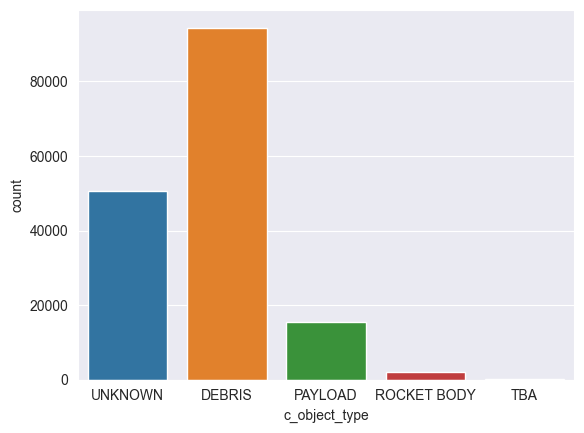

In [11]:
sns.countplot(x='c_object_type',data=train_path)

<Axes: xlabel='c_object_type', ylabel='risk'>

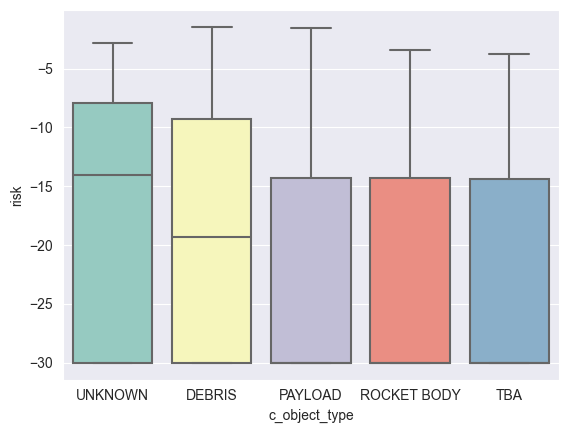

In [12]:
sns.boxplot(x="c_object_type", y='risk', data=train_path, palette="Set3")

<Axes: xlabel='c_object_type', ylabel='miss_distance'>

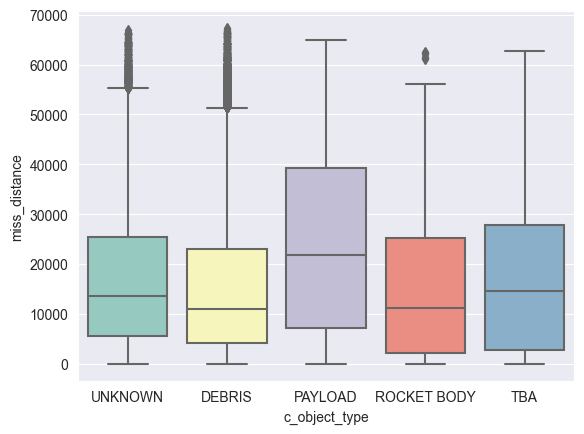

In [13]:
sns.boxplot(x="c_object_type", y='miss_distance', data=train_path, palette="Set3")

In [19]:
train_corr = train_path[["risk", "time_to_tca","c_time_lastob_end","c_time_lastob_start", "mahalanobis_distance","max_risk_estimate", "max_risk_scaling","miss_distance", "c_sigma_t", "relative_velocity_t", "c_actual_od_span", "c_recommended_od_span"]]

In [ ]:
train_corr2 = train_path[["time_to_tca","risk","max_risk_estimate", "max_risk_scaling","miss_distance","relative_speed","geocentric_latitude","azimuth","elevation","F3M", "SSN", "AP"]]

<Axes: >

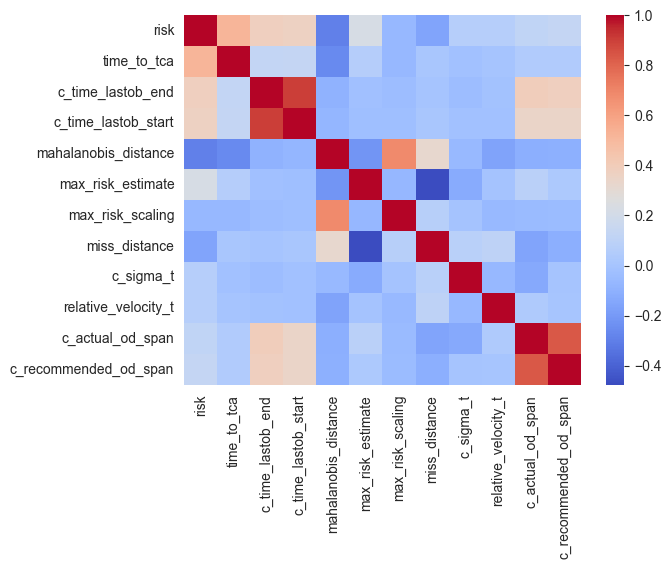

In [20]:
sns.heatmap(train_corr.corr(),cmap="coolwarm", annot=False)